In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Column names from the word document "Network Anamoly Detection" for the dataset
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

dataset = pd.read_csv("../Data/Train.txt", names=column_names)

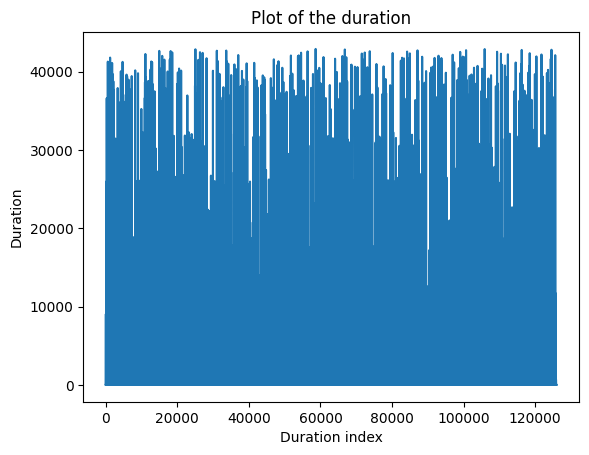

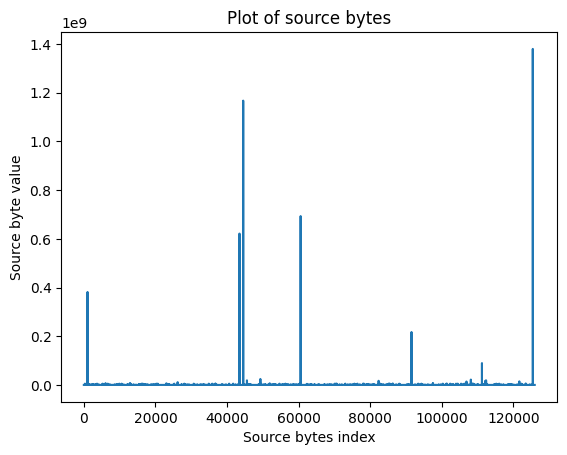

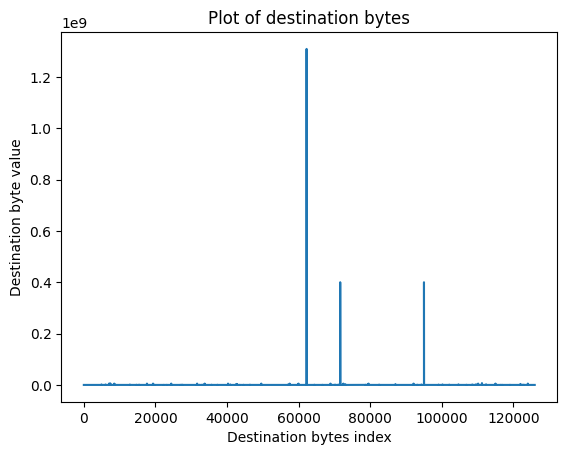

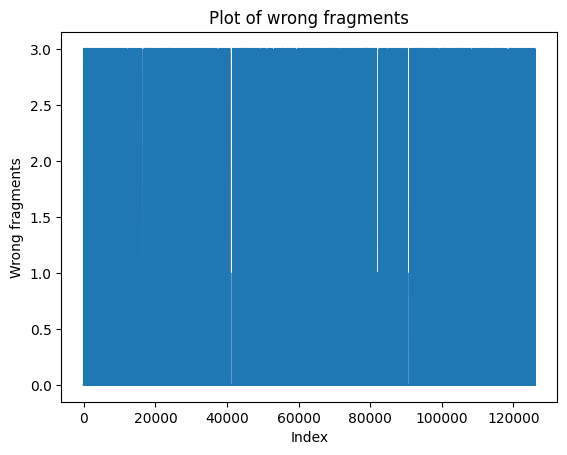

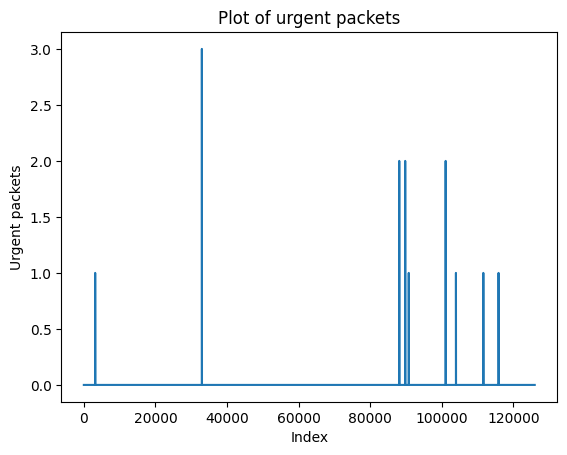

In [2]:
def general_plot(column, xlabel, ylabel, title):
    plt.plot(dataset[column])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)
    plt.show()

# Basic features of each network connection vector
general_plot("duration", "Duration index", "Duration", "Plot of the duration")
general_plot("src_bytes", "Source bytes index", "Source byte value", "Plot of source bytes")
general_plot("dst_bytes", "Destination bytes index", "Destination byte value",  "Plot of destination bytes")
general_plot("wrong_fragment", "Index", "Wrong fragments",  "Plot of wrong fragments")
general_plot("urgent", "Index", "Urgent packets",  "Plot of urgent packets")


In [3]:
# Spiked and extreme point's value
print("Spiked largest source bytes points")
print(dataset["src_bytes"].nlargest(15))
print(dataset[dataset["src_bytes"] >= 13904636]) # These fifteen spiked destination bytes indicate high likelihood of a portsweep attack but have a few normal ('duration' and 'last_flag' could be good to look at in conjunction)

print("Spiked largest destination bytes points")
print(dataset["dst_bytes"].nlargest(3))
print(dataset[dataset["dst_bytes"] >= 400291060]) # These three spiked destination bytes just indicate a portsweep attack

print("Spiked urgent packets points")
print(dataset[dataset["urgent"] > 0]) # An urgent packet can indicate two different attacks (rootkit, ftp_write) (with 'service' and 'last_flag' (seems better) as potential additional features)

print("extreme low points for wrong fragment values")
print(dataset[dataset["wrong_fragment"] == 0]) # A one shows 206 rows with the shown giving 'pod' attacks, a three shows 884 rows with the shown giving 'teardrop' attacks, a zero can indicate a neptune attack but a lot of data is also gotten, a two returns nothing


Spiked largest source bytes points
125429    1379963888
44527     1167519497
60570      693375640
43486      621568663
1038       381709090
91546      217277339
111229      89581520
49323       24418776
108124      21945520
45575       18828976
112380      18815556
112162      16980503
82355       16980502
121672      14584085
106900      13904636
Name: src_bytes, dtype: int64
        duration protocol_type   service    flag   src_bytes  dst_bytes  land  \
1038       35682           tcp    telnet  RSTOS0   381709090          0     0   
43486      38259           tcp   discard  RSTOS0   621568663          0     0   
44527      34578           tcp   private  RSTOS0  1167519497          0     0   
45575         31           tcp       X11      SF    18828976      33116     0   
49323        103           tcp       X11      SF    24418776     118160     0   
60570          2           tcp    finger    RSTO   693375640          0     0   
82355      12672           tcp     other    RSTR    1